In [49]:
#Import necessary packages from libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [51]:
#Load the given datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [53]:
#Merge customer profile with transaction data
customer_data = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).reset_index()

In [55]:
#Standardize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['TotalValue', 'TransactionID']])

In [57]:
#Fit KMeans clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [59]:
#Calculate DB Index (Davies-Bouldin Index)
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(customer_data_scaled, customer_data['Cluster'])
print(f"DB Index: {db_index}")

DB Index: 0.8000974907901729


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


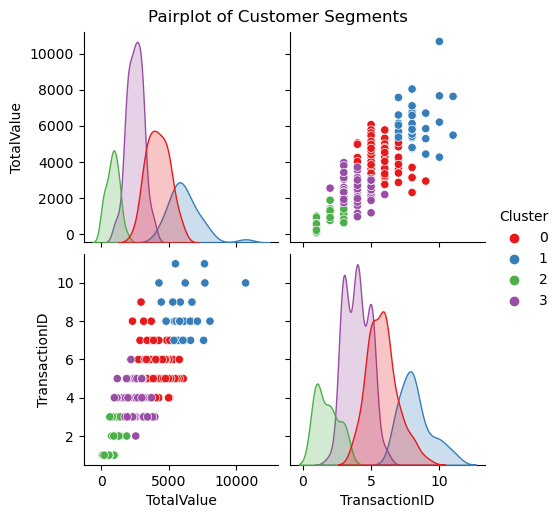

In [47]:
#Visualize pairwise relationships in TotalValue and TransactionID colored by clusters
sns.pairplot(customer_data[['TotalValue', 'TransactionID', 'Cluster']], hue='Cluster', palette='Set1')
plt.suptitle('Pairplot of Customer Segments', y=1.02)
plt.show()

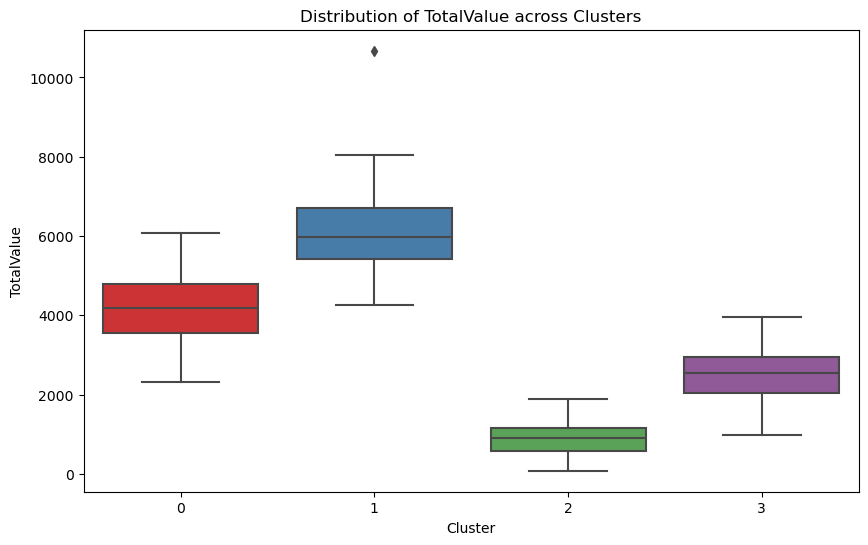

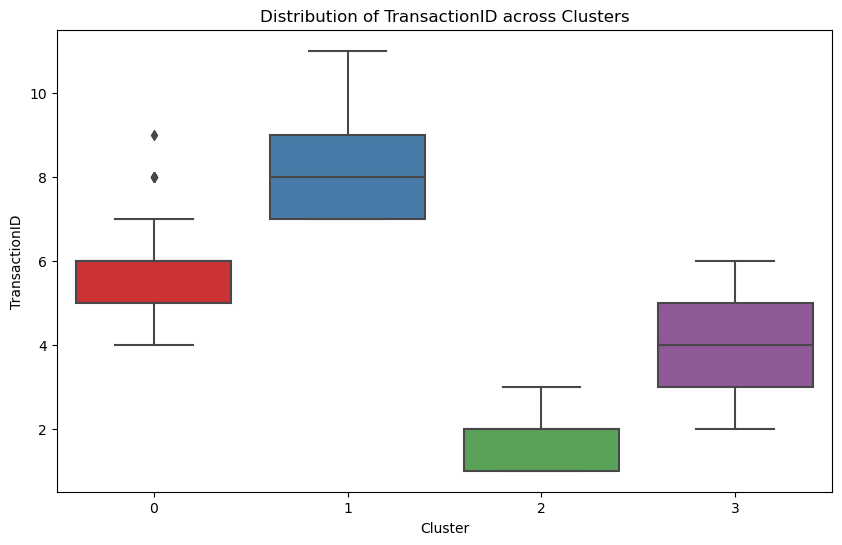

In [41]:
# Boxplot for TotalValue across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='TotalValue', data=customer_data, palette='Set1')
plt.title('Distribution of TotalValue across Clusters')
plt.show()

# Boxplot for TransactionID across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='TransactionID', data=customer_data, palette='Set1')
plt.title('Distribution of TransactionID across Clusters')
plt.show()
